# Notebook 4: Classification using CNN

**Only run it if you plan to experiment with this model, as it can take up to two hours to train.**

In this notebook, we will use a CNN model to classify the images, following the approach used in the following [paper](https://ui.adsabs.harvard.edu/abs/2023SPIE12729E..0KC/abstract).

---

### Reading the data

First, we’ll load the saved image and label data from the NumPy files.

In [1]:
import numpy as np  # Importing NumPy for numerical operations and array handling

# Load the images and labels back from the saved NumPy files
train_images = np.load('data/train_images.npy')  # Load image training data
train_labels = np.load('data/train_labels.npy')  # Load label training data


print("Data loaded successfully from NumPy files.")

Data loaded successfully from NumPy files.


---

### Train CubeCatNet CNN mdoel

We will define and train a Convolutional Neural Network (CNN) model that was defined in [link](https://ui.adsabs.harvard.edu/abs/2023SPIE12729E..0KC/abstract).

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Importing Sequential to build the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense  # Importing necessary layers for the CNN

from keras.utils import to_categorical

# One-hot encode the labels (assuming you have 5 classes)
train_labels = to_categorical(train_labels, num_classes=5)

# Define the CNN model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(512, 512, 3)),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer + ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(5, activation='softmax')  # Output layer with 5 neurons (one for each class) + Softmax activation
])

# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model defined and compiled successfully.")

# Train the model on the training data
history = model.fit(
    train_images, train_labels,
    epochs=10,  # Number of epochs
    batch_size=64,  # Batch size
)

print("Model training complete.")

2025-01-04 11:24:13.489809: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-04 11:24:14.573373: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-04 11:24:14.864749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 11:24:15.554688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 11:24:15.699595: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 11:24:16.344237: I tensorflow/core/platform/cpu_feature_gu

Model defined and compiled successfully.
Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.7044 - loss: 0.9993
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.9785 - loss: 0.1167
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.9898 - loss: 0.0430
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.9952 - loss: 0.0202
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9889 - loss: 0.0456
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9959 - loss: 0.0191
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9962 - loss: 0.0114
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.9983 - loss: 0.0055
Epoch 9/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.9978 - loss: 0.0066
Epoch 10/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.9942 - loss: 0.0279
Model training complete.


##### **Saving the CNN model**

In [3]:
import pickle

with open('cnn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [4]:
import gc

# Since we will no longer need the original training data (train_images), we can remove it from memory
del train_images, train_labels

# Force garbage collection to free up memory
gc.collect()

print("train_images, and train_labels removed from memory.")

train_images, and train_labels removed from memory.


---

### Deep learning: Validation set results

In [5]:
val_images = np.load('data/val_images.npy')  # Load image val data
val_labels = np.load('data/val_labels.npy')  # Load label val data
val_labels = to_categorical(val_labels, num_classes=5)

In [6]:
with open('cnn_model.pkl', 'rb') as file:
    cnn_loaded_model = pickle.load(file)
    
val_predictions = cnn_loaded_model.predict(val_images)

102/102 ━━━━━━━━━━━━━━━━━━━━ 34s 332ms/step


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert from one-hot or probability distributions to single integer class indices
val_predictions = np.argmax(val_predictions, axis=1) 
val_labels = np.argmax(val_labels, axis=1) 


# Detailed classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       727
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       421
           3       0.99      1.00      1.00       721
           4       1.00      1.00      1.00      1146

    accuracy                           1.00      3237
   macro avg       1.00      1.00      1.00      3237
weighted avg       1.00      1.00      1.00      3237



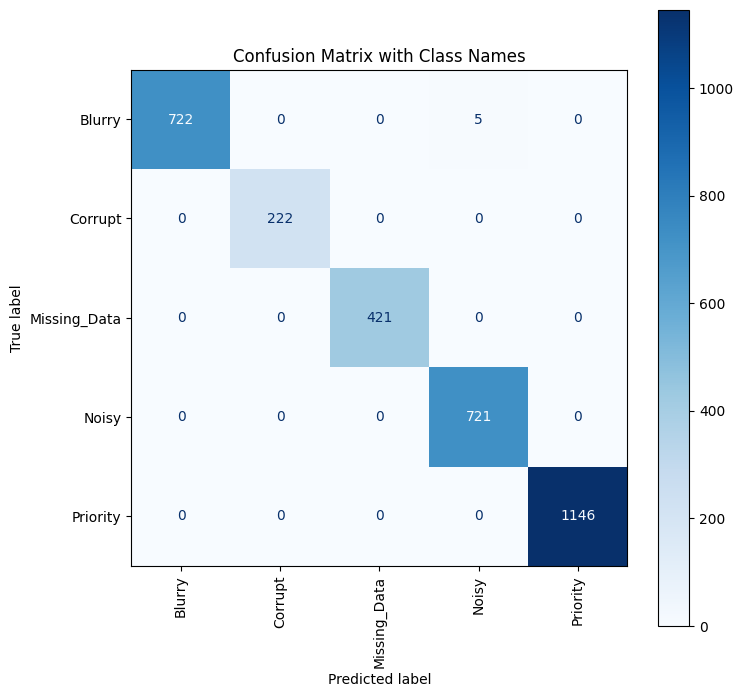

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Customize and display the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')  # Use a blue colormap
plt.title("Confusion Matrix with Class Names")
plt.show()

---

##### **⚠️ Freeing up Space**

In [9]:
import gc

# Since we will no longer need the original training data (train_images), we can remove it from memory
del val_predictions, val_labels, val_images

# Force garbage collection to free up memory
gc.collect()

%reset -f
print("Data removed from memory.")

Data removed from memory.


---